<a href="https://colab.research.google.com/github/antonioalbanese/NetworkDynamicsAndLearning/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
options = {
    'node_size': 1000,
    'width': 1, # width of the edges,
    'node_color': '#ffffff',
    'node_shape': 'o',
    'edge_color': 'black',
    'font_weight':'normal'
}

#Exercise 1

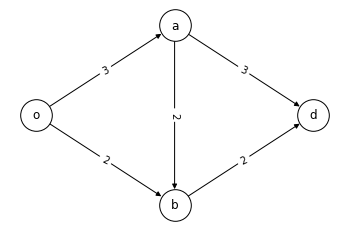

In [203]:
nodes = ['o', 'a', 'b', 'd']
edges = [('o','a',{'capacity':3}), ('o','b',{'capacity':2}), ('a','b',{'capacity':2}), ('a','d',{'capacity':3}), ('b','d',{'capacity':2})]

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = {'o': (40, 20), 'a': (60, 35), 'b': (60, 5), 'd': (80, 20)}
labels = nx.get_edge_attributes(G,'capacity')


plt.subplot(111)
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)
nx.draw(G, pos, with_labels=True, **options)
ax= plot.gca()
ax.collections[0].set_edgecolor("black")

## Exercise 1.b

In [204]:
#trying to change on (b,d)
old = G['b']['d']['capacity']
G['b']['d']['capacity'] = old + 1
value, flows = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print("Adding 1 to (b,d) -> max_flow = {}".format(value))
#revert
G['b']['d']['capacity'] = old 

#trying to change on (o,a)
old = G['o']['a']['capacity']
G['o']['a']['capacity'] = old + 1
value, flows = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print("Adding 1 to (o,a) -> max_flow = {}".format(value))
#revert
G['o']['a']['capacity'] = old 

#trying to change on (a,d)
old = G['a']['d']['capacity']
G['a']['d']['capacity'] = old + 1
value, flows = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print("Adding 1 to (a,d) -> max_flow = {}".format(value))
#revert
G['a']['d']['capacity'] = old 

#trying to change on (o,b)
old = G['o']['b']['capacity']
G['o']['b']['capacity'] = old + 1
value, flows = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print("Adding 1 to (o,b) -> max_flow = {}".format(value))
#revert
G['o']['b']['capacity'] = old 

Adding 1 to (b,d) -> max_flow = 5
Adding 1 to (o,a) -> max_flow = 5
Adding 1 to (a,d) -> max_flow = 5
Adding 1 to (o,b) -> max_flow = 5


*Cuts:*
- $U=\{o,b,a\},U^C=\{d\}$ -> $C_U = 5$
- $U=\{o,a\},U^C=\{b,d\}$ -> $C_U = 7$
- $U=\{o,b\},U^C=\{a,d\}$ -> $C_U = 5$
- $U=\{o\},U^C=\{a,b,d\}$ -> $C_U = 5$

There are three mincuts, whose capacity is 5. 
- For the mincut $U=\{o,b,a\},U^C=\{d\}$,
$$
C_U = c(b,d) + c(a,d)
$$ 
- For the mincut $U=\{o,b\},U^C=\{a,d\}$,
$$
C_U = c(o,a) + c(b,d)
$$ 
- For the mincut $U=\{o\},U^C=\{a,b,d\}$,
$$
C_U = c(o,a) + c(o,b)
$$ 

Indipendently from where we apply one more unit of capacity the max throughput cannot be improved.





## Exercise 1.c

In [205]:
#trying to change on (b,d)
old1 = G['b']['d']['capacity']
G['b']['d']['capacity'] = old1 + 1
old2 = G['o']['b']['capacity']
G['o']['b']['capacity'] = old2 + 1
value, flows = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print("Adding 1 to (b,d) and 1 to (o,b) -> max_flow = {}".format(value))
#revert
G['b']['d']['capacity'] = old1
G['o']['b']['capacity'] = old2


Adding 1 to (b,d) and 1 to (o,b) -> max_flow = 6


*Cuts:*
- $U=\{o,b,a\},U^C=\{d\}$ -> $C_U = 5$
- $U=\{o,a\},U^C=\{b,d\}$ -> $C_U = 7$
- $U=\{o,b\},U^C=\{a,d\}$ -> $C_U = 5$
- $U=\{o\},U^C=\{a,b,d\}$ -> $C_U = 5$

There are three mincuts, whose capacity is 5. \\
The optimum solution is to distribute de 2 units of capacity to be added. 

- For the mincut $U=\{o,b,a\},U^C=\{d\}$,
$$
C_U = c(b,d) + c(a,d) = 2 + 3
$$ 
- For the mincut $U=\{o,b\},U^C=\{a,d\}$,
$$
C_U = c(o,a) + c(b,d) = 3 + 2
$$ 
- For the mincut $U=\{o\},U^C=\{a,b,d\}$,
$$
C_U = c(o,a) + c(o,b) = 3 + 2
$$ 

Adding 1 unit on $(b,d)$ and 1 unit on $(o,b)$ makes the maximum flow equals to 6.


## Exercise 1.d

In [209]:
min_cut = 0
to_add = 2
optimal_cuts = {
    0:[]
}
optimal_edges = {
    0:[]
}
edges = dict({
  'c(o,a)' : 3,
  'c(o,b)' : 2,
  'c(a,b)' : 2,
  'c(a,d)' : 3,
  'c(b,d)' : 2
  
})

def remake_cut():
  global min_cut
  global edges
  global optimal_cuts
  global optimal_edges
  cut1 = edges['c(b,d)'] + edges['c(a,d)']
  cut2 = edges['c(o,b)'] + edges['c(a,b)'] + edges['c(a,d)']
  cut3 = edges['c(o,a)'] + edges['c(b,d)']
  cut4 = edges['c(o,a)'] + edges['c(o,b)']
  min_c = min(cut1, cut2, cut3, cut4)
  tmp = edges.copy()
  if min_c >= min_cut:
    #optimal_cuts.pop(min_cut, None)
    #optimal_edges.pop(min_cut, None)
    min_cut = min_c
    if min_cut not in optimal_cuts.keys():
      optimal_cuts[min_cut] = [tuple([cut1, cut2, cut3, cut4])]
      optimal_edges[min_cut] = [tmp]
    else:
      if tmp not in optimal_edges[min_cut]:
        optimal_cuts[min_cut].append(tuple([cut1, cut2, cut3, cut4]))
        optimal_edges[min_cut].append(tmp)

def compute(to_add):
  global edges
  for el in edges:
    if to_add == 0:
      #print(edges)
      remake_cut()
      #check(edges)
      return
    else:
      edges[el] = edges[el]+1
      compute(to_add-1)
    edges[el] = edges[el]-1  


In [210]:
compute(to_add)

sums = optimal_cuts[max(optimal_cuts.keys())]
sums = [sum(el) for el in sums]
index = sums.index(max(sums))
optimal_set_of_edges = optimal_edges[max(optimal_cuts.keys())][index]
print("optimal edges: ",optimal_set_of_edges)
print("optimal cut: ", optimal_cuts[max(optimal_cuts.keys())][index])

optimal edges:  {'c(o,a)': 4, 'c(o,b)': 2, 'c(a,b)': 2, 'c(a,d)': 4, 'c(b,d)': 2}
optimal cut:  (6, 8, 6, 6)


In [214]:
optimal_edges[6]

[{'c(a,b)': 2, 'c(a,d)': 4, 'c(b,d)': 2, 'c(o,a)': 4, 'c(o,b)': 2},
 {'c(a,b)': 2, 'c(a,d)': 3, 'c(b,d)': 3, 'c(o,a)': 4, 'c(o,b)': 2},
 {'c(a,b)': 2, 'c(a,d)': 3, 'c(b,d)': 3, 'c(o,a)': 3, 'c(o,b)': 3}]

In [168]:
for i, (a, s) in enumerate(zip(zip(optimal_cuts[7], optimal_edges[7]), sums)):
  print(f"Configuration {i+1}:")
  print(f"Edges: {a[1]}")
  print(f"Cuts: ", {a[0]})
  print(f"Sum of cuts: {s}\n\n")

Configuration 1:
Edges: {'c(o,a)': 5, 'c(o,b)': 2, 'c(a,b)': 2, 'c(a,d)': 5, 'c(b,d)': 2}
Cuts:  {(7, 9, 7, 7)}
Sum of cuts: 30


Configuration 2:
Edges: {'c(o,a)': 5, 'c(o,b)': 2, 'c(a,b)': 2, 'c(a,d)': 4, 'c(b,d)': 3}
Cuts:  {(7, 8, 8, 7)}
Sum of cuts: 30


Configuration 3:
Edges: {'c(o,a)': 5, 'c(o,b)': 2, 'c(a,b)': 2, 'c(a,d)': 3, 'c(b,d)': 4}
Cuts:  {(7, 7, 9, 7)}
Sum of cuts: 30


Configuration 4:
Edges: {'c(o,a)': 4, 'c(o,b)': 3, 'c(a,b)': 2, 'c(a,d)': 4, 'c(b,d)': 3}
Cuts:  {(7, 9, 7, 7)}
Sum of cuts: 30


Configuration 5:
Edges: {'c(o,a)': 4, 'c(o,b)': 3, 'c(a,b)': 2, 'c(a,d)': 3, 'c(b,d)': 4}
Cuts:  {(7, 8, 8, 7)}
Sum of cuts: 30


Configuration 6:
Edges: {'c(o,a)': 3, 'c(o,b)': 4, 'c(a,b)': 2, 'c(a,d)': 3, 'c(b,d)': 4}
Cuts:  {(7, 9, 7, 7)}
Sum of cuts: 30




*Cuts:*
- $U=\{o,b,a\},U^C=\{d\}$ -> $C_U = 5$ -> $C_U = c(b,d) + c(a,d) = 2 + 3$ 
- $U=\{o,a\},U^C=\{b,d\}$ -> $C_U = 7$ -> $C_U = c(o,b) + c(a,b) + c(a,d) = 2 + 2 + 3$ 
- $U=\{o,b\},U^C=\{a,d\}$ -> $C_U = 5$ -> $C_U = c(o,a) + c(b,d) = 3 + 2$
- $U=\{o\},U^C=\{a,b,d\}$ -> $C_U = 5$ -> $C_U = c(o,a) + c(o,b) = 3 + 2$ 


The max-throughput reachable adding 4 units of capacity is 7.
The max sum of the cut capacities among all combinations of optimum capacity distribution is 30. One of the configurations that gives this result is
$$ 
\begin{cases}
c(a,b) = 2 \rightarrow c(a,b) = 2 \\ 
c(a,d) = 3 \rightarrow c(a,d) = 3 \\ 
\bf{c(b,d) = 2 \rightarrow c(b,d) = 4} \\
c(o,a) = 3 \rightarrow c(o,a) = 3 \\ 
\bf{c(o,b) = 2 \rightarrow c(o,b) = 4} 
\end{cases}$$

that gives the following cuts: 
- $U=\{o,b,a\},U^C=\{d\}$ -> $C_U = c(b,d) + c(a,d) = 4 + 3 = 7$ 
- $U=\{o,a\},U^C=\{b,d\}$ -> $C_U = c(o,b) + c(a,b) + c(a,d) = 4 + 2 + 3 = 9$ 
- $U=\{o,b\},U^C=\{a,d\}$ -> $C_U = c(o,a) + c(b,d) = 3 + 4 = 7$ 
- $U=\{o\},U^C=\{a,b,d\}$ -> $C_U = c(o,a) + c(o,b) = 3 + 4 = 7$ 


In [34]:
#trying to change on (b,d) and (o,b)
old1 = G['b']['d']['capacity']
G['b']['d']['capacity'] = old1 + 2
old2 = G['o']['b']['capacity']
G['o']['b']['capacity'] = old2 + 2
value, flows = nx.algorithms.flow.maximum_flow(G, 'o', 'd', capacity='capacity')
print("Adding 2 to (b,d) and 2 to (o,b) -> max_flow = {}".format(value))
#revert
G['b']['d']['capacity'] = old1
G['o']['b']['capacity'] = old2

Adding 2 to (b,d) and 2 to (o,b) -> max_flow = 7


# Exercise 2

## Exercise 2.a

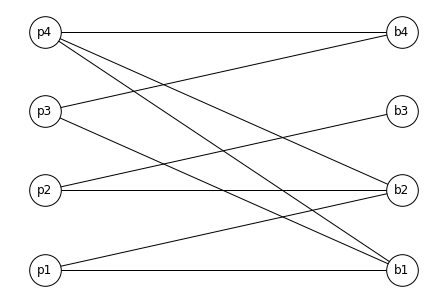

In [35]:
#creating and drawing the graph
BG = nx.Graph()
nodes = ['p1','p2','p3','p4','b1','b2','b3','b4']
edges = [('p1', 'b1',{'capacity': 1}), ('p1', 'b2',{'capacity': 1}), ('p2', 'b2',{'capacity': 1}), ('p2', 'b3',{'capacity': 1}), ('p3', 'b1',{'capacity': 1}), ('p3', 'b4',{'capacity': 1}), ('p4', 'b1',{'capacity': 1}), ('p4', 'b2',{'capacity': 1}), ('p4', 'b4',{'capacity': 1})]
BG.add_nodes_from(nodes)
BG.add_edges_from(edges)
#BG.add_node('o')
#BG.add_node('d')
#BG.add_edges_from([('o','p1',{'capacity': 1}),('o','p2',{'capacity': 1}),('o','p3',{'capacity': 1}),('o','p4',{'capacity': 1}),('b1','d',{'capacity': 1}),('b2','d',{'capacity': 1}),('b3','d',{'capacity': 1}),('b4','d',{'capacity': 1})])
#labels = nx.get_edge_attributes(BG,'capacity')

pos = {'p1': (40, 20), 'p2': (40, 40), 'p3': (40, 60), 'p4': (40, 80), 'b1': (80, 20), 'b2': (80, 40), 'b3': (80, 60), 'b4': (80, 80)}
#nx.draw_networkx_edge_labels(BG, pos, edge_labels = labels)
nx.draw(BG, pos, **options, with_labels=True)
ax= plot.gca()
ax.collections[0].set_edgecolor("black")


## Exercise 2.b

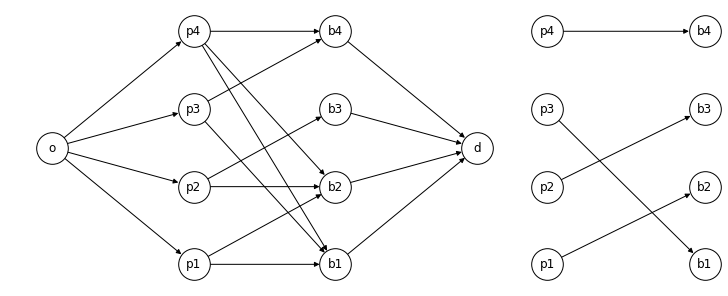

In [82]:
## using flow
BG = nx.DiGraph()
nodes = ['p1','p2','p3','p4','b1','b2','b3','b4']
edges = [('p1', 'b1',{'capacity': 1}), ('p1', 'b2',{'capacity': 1}), ('p2', 'b2',{'capacity': 1}), ('p2', 'b3',{'capacity': 1}), ('p3', 'b1',{'capacity': 1}), ('p3', 'b4',{'capacity': 1}), ('p4', 'b1',{'capacity': 1}), ('p4', 'b2',{'capacity': 1}), ('p4', 'b4',{'capacity': 1})]
BG.add_nodes_from(nodes)
BG.add_edges_from(edges)
### adding origin and destination
BG.add_node('o')
BG.add_node('d')
BG.add_edges_from([('o','p1',{'capacity': 1}),('o','p2',{'capacity': 1}),('o','p3',{'capacity': 1}),('o','p4',{'capacity': 1}),('b1','d',{'capacity': 1}),('b2','d',{'capacity': 1}),('b3','d',{'capacity': 1}),('b4','d',{'capacity': 1})])
labels = nx.get_edge_attributes(BG,'capacity')
pos = {'o':(0,50),'p1': (40, 20), 'p2': (40, 40), 'p3': (40, 60), 'p4': (40, 80), 'b1': (80, 20), 'b2': (80, 40), 'b3': (80, 60), 'b4': (80, 80),'d':(120,50)}

fig = plt.figure(constrained_layout=True, figsize=(10,4))
gs = fig.add_gridspec(4, 5)
## drawing with origin and destination
f_ax1 = fig.add_subplot(gs[:, :3])
nx.draw(BG, pos, **options, with_labels=True)
ax= plot.gca()
ax.collections[0].set_edgecolor("black")


### finding max flow and printing the matching graph
value, flow = nx.algorithms.flow.maximum_flow(BG, 'o', 'd', capacity='capacity')
new_edges = [(el,f, {'capacity':1}) for el in flow for f in flow[el] if flow[el][f]!= 0]
matchingGraph = nx.DiGraph()
matchingGraph.add_nodes_from(nodes)
matchingGraph.add_edges_from(new_edges)
matchingGraph.remove_nodes_from(['o','d'])


f_ax1 = fig.add_subplot(gs[:, 3:])
nx.draw(matchingGraph, pos, **options, with_labels=True)
ax= plot.gca()
ax.collections[0].set_edgecolor("black")


In [ ]:
##using matching from nx ##find another matching but also previuos is good
match = nx.bipartite.maximum_matching(BG)
new_edges = [(k,match[k]) for k in match]
new_G = nx.Graph()
new_G.add_nodes_from(nodes)
new_G.add_edges_from(new_edges)
nx.draw(new_G, pos, **options, with_labels=True)

## Exercise 2.c

max-flow =  8


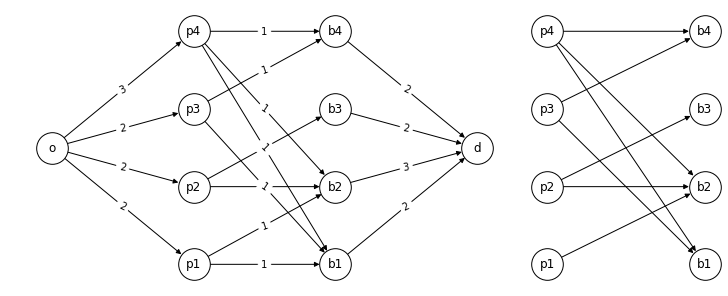

In [84]:
## adding capacity to book-destination edges
Gc = nx.DiGraph()
nodes = ['p1','p2','p3','p4','b1','b2','b3','b4']
edges = [('p1', 'b1',{'capacity': 1}), ('p1', 'b2',{'capacity': 1}), ('p2', 'b2',{'capacity': 1}), ('p2', 'b3',{'capacity': 1}), ('p3', 'b1',{'capacity': 1}), ('p3', 'b4',{'capacity': 1}), ('p4', 'b1',{'capacity': 1}), ('p4', 'b2',{'capacity': 1}), ('p4', 'b4',{'capacity': 1})]
Gc.add_nodes_from(nodes)
Gc.add_edges_from(edges)
Gc.add_node('o')
Gc.add_node('d')
Gc.add_edges_from([('o','p1',{'capacity': 2}),('o','p2',{'capacity': 2}),('o','p3',{'capacity': 2}),('o','p4',{'capacity': 3}),('b1','d',{'capacity': 2}),('b2','d',{'capacity': 3}),('b3','d',{'capacity': 2}),('b4','d',{'capacity': 2})])
labels = nx.get_edge_attributes(Gc,'capacity')
pos = {'o':(0,50),'p1': (40, 20), 'p2': (40, 40), 'p3': (40, 60), 'p4': (40, 80), 'b1': (80, 20), 'b2': (80, 40), 'b3': (80, 60), 'b4': (80, 80),'d':(120,50)}

fig = plt.figure(constrained_layout=True, figsize=(10,4))
gs = fig.add_gridspec(4, 5)
## drawing with origin and destination
f_ax1 = fig.add_subplot(gs[:, :3])
nx.draw_networkx_edge_labels(Gc, pos, edge_labels = labels)
nx.draw(Gc, pos, **options, with_labels=True)
ax= plot.gca()
ax.collections[0].set_edgecolor("black")


### finding max flow and printing the matching graph
value, flow = nx.algorithms.flow.maximum_flow(Gc, 'o', 'd', capacity='capacity')
new_edges = [(el,f) for el in flow for f in flow[el] if flow[el][f]!= 0]
matchingGraphC = nx.DiGraph()
matchingGraphC.add_nodes_from(nodes)
matchingGraphC.add_edges_from(new_edges)
labels = nx.get_edge_attributes(matchingGraphC,'capacity')
matchingGraphC.remove_nodes_from(['o','d'])
pos = {'p1': (40, 20), 'p2': (40, 40), 'p3': (40, 60), 'p4': (40, 80), 'b1': (80, 20), 'b2': (80, 40), 'b3': (80, 60), 'b4': (80, 80)}
f_ax1 = fig.add_subplot(gs[:, 3:])
nx.draw(matchingGraphC, pos, **options, with_labels=True)
ax= plot.gca()
ax.collections[0].set_edgecolor("black")

print("max-flow = ", value)


## Exercise 2.d

There are 2 copies of book 'b3' that is required only from 'p2', while there are 2 copies of book 'b1' that is required from 'p1', 'p3', 'p4'. 

So, to maximize the number of assigned books 1 copy of 'b2' should be sold and 1 copy of 'b1' should be bought.

Doing so:

max-flow =  9


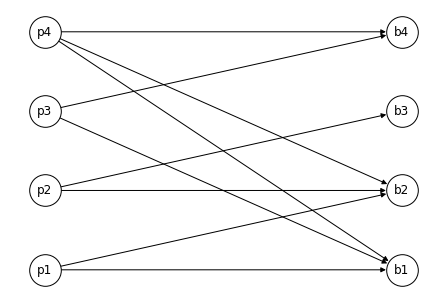

In [85]:
Gc['b3']['d']['capacity'] = 1
Gc['b1']['d']['capacity'] = 3

### finding max flow and printing the matching graph
value, flow = nx.algorithms.flow.maximum_flow(Gc, 'o', 'd', capacity='capacity')
new_edges = [(el,f) for el in flow for f in flow[el] if flow[el][f]!= 0]
matchingGraphC = nx.DiGraph()
matchingGraphC.add_nodes_from(nodes)
matchingGraphC.add_edges_from(new_edges)
labels = nx.get_edge_attributes(matchingGraphC,'capacity')
matchingGraphC.remove_nodes_from(['o','d'])
pos = {'p1': (40, 20), 'p2': (40, 40), 'p3': (40, 60), 'p4': (40, 80), 'b1': (80, 20), 'b2': (80, 40), 'b3': (80, 60), 'b4': (80, 80)}
#nx.draw_networkx_edge_labels(matchingGraphC, pos, edge_labels = labels)
nx.draw(matchingGraphC, pos, **options, with_labels=True)
ax= plot.gca()
ax.collections[0].set_edgecolor("black")
print("max-flow = ", value)

# Exercise 3

In [87]:
from scipy import io
import numpy as np
import cvxpy as cp

file = io.loadmat('capacities.mat')
capacities = file.get('capacities')
capacities = capacities.reshape(28,)
file = io.loadmat('traveltime.mat')
traveltime = file.get('traveltime')
traveltime = traveltime.reshape(28,)
file = io.loadmat('flow.mat')
flow = file.get('flow')
flow = flow.reshape(28,)
file = io.loadmat('traffic.mat')
traffic = file.get('traffic')

#print("traffic: \n", traffic)
#print("flow: \n", flow)
#print("travel time: \n", traveltime)
#print("capacities: \n", capacities)



## Exercise 3.a

In [169]:
B = traffic
n_edges = traffic.shape[1]
n_nodes = traffic.shape[0]
tau = 1
tmp = np.zeros(n_nodes)
tmp[0] = 1
tmp[-1] = -1
nu = tmp * tau
# l stores the coefficients of the linear terms of the objective function, in this case the length of the links.
# In this case, the objective function is
l = traveltime

# Construct the problem.
f = cp.Variable(n_edges)
objective = cp.Minimize(l.T @ f)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for f is stored in `f.value`.
print("Optimal f:",  np.around(f.value, decimals=0, out=None))

Optimal f: [1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0.]


e1, e2, e9, e12, e25

## Exercise 3.b

In [170]:
edges = []
for (i,col) in enumerate(B.T):
  tail = -1
  haed = -1
  for (j,row) in enumerate(col):
    x=B.T[i][j]
    if x == 1:
      tail = j+1
    elif x ==-1:
      haed = j+1
    if tail!=-1 and haed !=-1:
      edges.append(tuple([tail,haed]))
      break

nodes = list(range(1, 18))
edges_cap = [tuple([e[0], e[1], {'capacity':c}]) for (e, c) in zip(edges,capacities)]

In [171]:
G = nx.DiGraph()
G.add_edges_from(edges_cap)
G.add_nodes_from(nodes)
value, Gflow = nx.algorithms.flow.maximum_flow(G, 1, 17, capacity='capacity')

In [172]:
found_flow = np.zeros(n_edges)
for el in Gflow:
  for f in Gflow[el]:
    t = tuple([el,f])
    index = edges.index(t)
    found_flow[index] = Gflow[el][f]

print("Max flow is: ", value)
print("With flow vector: ", list(found_flow.astype(np.int32)))

Max flow is:  22448
With flow vector:  [8741, 8741, 0, 0, 13707, 4624, 4624, 4624, 6297, 0, 0, 8741, 0, 0, 9083, 825, 8258, 0, 0, 7068, 825, 7893, 3835, 0, 10355, 3835, 8258, 8258]


## Exercise 3.c

In [173]:
v = B @ flow
inflow = [el if el > 0 else 0 for el in v ]
print("The external inflow relative to the given flow f is: v_+ = ",inflow)

The external inflow relative to the given flow f is: v_+ =  [16806, 8570, 19448, 4957, 0, 4768, 413, 0, 0, 1169, 0, 0, 0, 0, 0, 0, 0]


## Exercise 3.d

In [174]:
# Problem data.

# compute node_edge incidence matrix
# +1 if the node is the source (tail) of an edge 
# and -1 if it is the destination (head) of the edge.
B = traffic
n_edges = B.shape[1]

# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
nu = np.zeros(v.shape[0])
nu[0] = v[0]
nu[-1] = -v[0]
# Q and l store the coefficients of the quadratic
# and linear terms of the objective function.
# In this case, the objective function is
# f_1^2 + f_2
c = capacities # diagonal matrix
l = traveltime # 1d array

# Construct the problem.
f = cp.Variable(n_edges)
function = cp.sum(cp.multiply(cp.multiply(l,c),cp.inv_pos(1 - f/c))- cp.multiply(l,c))
objective = cp.Minimize(function)
constraints = [B @ f == nu, f >=0, f<=c]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
cost_opt = prob.solve()
# The optimal value for f is stored in `f.value`.
opt_flow = f.value
print("Social optimal flow:", np.around(opt_flow, decimals=0, out=None))
print("Optimal cost:", np.around(cost_opt, decimals=2, out=None))
social_opt = f

Social optimal flow: [ 6642.  6059.  3132.  3132. 10164.  4638.  3006.  2543.  3132.   583.
     0.  2927.     0.  3132.  5525.  2854.  4886.  2215.   464.  2338.
  3318.  5656.  2373.     0.  6414.  5505.  4886.  4886.]
Optimal cost: 25943.61


## Exercise 3.e

In [175]:
B = traffic
n_edges = B.shape[1]

# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
nu = np.zeros(v.shape[0])
nu[0] = v[0]
nu[-1] = -v[0]
# Q and l store the coefficients of the quadratic
# and linear terms of the objective function.
c = capacities
l = traveltime

# Construct the problem.
f = cp.Variable(n_edges)
function = cp.sum(-cp.multiply(cp.multiply(c,l),cp.log(1-cp.multiply(f,cp.inv_pos(c)))))
objective = cp.Minimize(function)
constraints = [B @ f == nu, f >=0, f<=c]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result_w = prob.solve()
# The optimal value for f is stored in `f.value`.
print("Wardrop equilibrium:", np.around(f.value, decimals=2, out=None))

wardrop_f = f
wardrop_cost = sum(wardrop_f.value*l/(1 - wardrop_f.value/c))
print("Wardrop cost: ", wardrop_cost)

Wardrop equilibrium: [ 6715.65  6715.65  2367.41  2367.41 10090.35  4645.39  2803.84  2283.56
  3418.48     0.     176.83  4171.41     0.    2367.41  5444.96  2353.17
  4933.34  1841.55   697.11  3036.49  3050.28  6086.77  2586.51     0.
  6918.74  4953.92  4933.34  4933.34]
Wardrop cost:  26292.96387462939


## Exercise 3.e(2)

In [176]:
B = traffic
n_edges = B.shape[1]

# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
nu = np.zeros(v.shape[0])
nu[0] = v[0]
nu[-1] = -v[0]
# Q and l store the coefficients of the quadratic
# and linear terms of the objective function.
c = capacities
l = traveltime

# Construct the problem.
f = cp.Variable(n_edges)
d_prime = cp.multiply(cp.multiply(l,c),cp.inv_pos(cp.power((c - social_opt.value),2)))
omega = cp.multiply(social_opt.value,d_prime)
function = cp.sum(-cp.multiply(cp.multiply(c,l),cp.log(1-cp.multiply(f,cp.inv_pos(c)))) + cp.multiply(f,omega))
objective = cp.Minimize(function)
constraints = [B @ f == nu, f >=0, f<=c]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result_w = prob.solve()
# The optimal value for f is stored in `f.value`.
print("Wardrop equilibrium with tolls:", np.around(f.value, decimals=2, out=None))
tolls_f = f
wardrop_tolls_cost = sum(tolls_f.value*l/(1 - tolls_f.value/c))
print("Wardrop cost with tolls: ", wardrop_tolls_cost)

Wardrop equilibrium with tolls: [ 6642.98  6059.08  3132.47  3132.47 10163.02  4638.26  3006.32  2542.34
  3131.49   583.9      0.    2926.61     0.    3132.47  5524.77  2854.23
  4886.37  2215.83   463.99  2337.46  3318.21  5655.67  2373.04     0.
  6414.12  5505.51  4886.37  4886.37]
Wardrop cost with tolls:  25943.62242759806


## Exercise 3.f


In [190]:
B = traffic
n_edges = B.shape[1]

# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
nu = np.zeros(v.shape[0])
nu[0] = v[0]
nu[-1] = -v[0]
# Q and l store the coefficients of the quadratic
# and linear terms of the objective function.
c = capacities
l = traveltime

# Construct the problem.
f = cp.Variable(n_edges)
delay = cp.multiply(cp.multiply(l,c),cp.inv_pos(1 - f/c))- cp.multiply(l,c) - cp.multiply(f,l)
function = cp.sum(delay)
objective = cp.Minimize(function)
constraints = [B @ f == nu, f >=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for f is stored in `f.value`.
print("New delay f*:", np.around(f.value, decimals=1, out=None))
print("Total cost = ", result)
new_soc_flow = f
new_soc_opt_value = f.value

New delay f*: [ 6653.3  5774.7  3419.7  3419.7 10152.7  4642.7  3105.8  2662.2  3009.1
   878.6     0.   2354.9     0.   3419.7  5510.   3043.7  4881.8  2415.5
   443.7  2008.   3487.4  5495.4  2203.8     0.   6300.7  5623.5  4881.8
  4881.8]
Total cost =  15095.508672309395


In [200]:
## wardrop con nuovo costo e senza tolls

B = traffic
n_edges = B.shape[1]

# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
nu = np.zeros(v.shape[0])
nu[0] = v[0]
nu[-1] = -v[0]
# Q and l store the coefficients of the quadratic
# and linear terms of the objective function.
c = capacities
l = traveltime

# Construct the problem.
f = cp.Variable(n_edges)
function = cp.sum(-cp.multiply(cp.multiply(c,l),cp.log(1-cp.multiply(f,cp.inv_pos(c)))) - cp.multiply(f,l))
objective = cp.Minimize(function)
constraints = [B @ f == nu, f >=0, f<=c]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
new_result_w = prob.solve()
# The optimal value for f is stored in `f.value`.
print("New Wardrop equilibrium:", np.around(f.value, decimals=2, out=None))
new_wardrop_f = f
new_wardrop_cost = sum(new_wardrop_f.value*l/(1 - new_wardrop_f.value/c) - new_wardrop_f.value*l)
print("New Wardrop cost: ", new_wardrop_cost)

New Wardrop equilibrium: [6.781720e+03 6.004900e+03 3.266270e+03 3.266250e+03 1.002428e+04
 4.665560e+03 3.028900e+03 2.641040e+03 3.038820e+03 7.768200e+02
 2.403100e+02 2.498320e+03 2.000000e-02 3.266250e+03 5.358720e+03
 2.881520e+03 4.890690e+03 2.413490e+03 6.281700e+02 2.100550e+03
 3.509690e+03 5.610240e+03 2.262590e+03 0.000000e+00 6.386470e+03
 5.528840e+03 4.890690e+03 4.890690e+03]
New Wardrop cost:  15148.086835153885


We defined the new delay as $ \tau_e = d_e(f_e^*) - l_e $

To have the wardrop flow with tolls coincide with the system optimum the tolls have to be: $ω^*_e = f^*_e \tau'_e(f^*_e)$

Defining tolls in that way the objective function is: 
$$ \tau'_e = \frac{l_e c_e}{(c_e-f_e^*)^2} $$

In [202]:
## wardrop con nuovo costo e senza tolls

B = traffic
n_edges = B.shape[1]

# exogenous flow vector: one unit of flow enters the origin and 
# exits the destination node
nu = np.zeros(v.shape[0])
nu[0] = v[0]
nu[-1] = -v[0]
# Q and l store the coefficients of the quadratic
# and linear terms of the objective function.
c = capacities
l = traveltime

# Construct the problem.
f = cp.Variable(n_edges)
d_prime = cp.multiply(cp.multiply(l,c),cp.inv_pos(cp.power((c - new_soc_opt_value),2)))
omega = cp.multiply(new_soc_opt_value,d_prime)
function = cp.sum(-cp.multiply(cp.multiply(c,l),cp.log(1-cp.multiply(f,cp.inv_pos(c)))) - cp.multiply(f,l) + cp.multiply(f,omega))
objective = cp.Minimize(function)
constraints = [B @ f == nu, f >=0, f<=c]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
new_result_w = prob.solve()
# The optimal value for f is stored in `f.value`.
print("New Wardrop equilibrium:", np.around(f.value, decimals=2, out=None))
new_wardrop_f = f
new_wardrop_cost = sum(new_wardrop_f.value*l/(1 - new_wardrop_f.value/c) - new_wardrop_f.value*l)
print("New Wardrop cost: ", new_wardrop_cost)

New Wardrop equilibrium: [ 6653.37  5775.47  3419.42  3419.42 10152.63  4642.73  3105.5   2661.73
  3009.22   877.9      0.    2356.05     0.    3419.42  5509.9   3043.32
  4881.71  2415.13   443.77  2008.56  3487.09  5495.65  2204.03     0.
  6300.84  5623.45  4881.71  4881.71]
New Wardrop cost:  15095.512806188253
